# Analysis of Directed Search
This document looks at the initial results of the directed serach

In [1]:
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench.em_framework.optimization import (ArchiveLogger,
                                                     EpsilonProgress)

import pandas as pd
import matplotlib.pyplot as plt

# First, get the model
dike_model, planning_steps = get_model_for_problem_formulation(2)


In [2]:
# import the results

results = pd.read_csv("directed search results/dike_model_policy_design_big_nfe.csv", index_col=0)
convergence = pd.read_csv("directed search results/dike_model_policy_design_convergence_big_nfe.csv") 

results.head()


,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Total Investment Costs
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,2.843996e+06,1.522105e+08,0.0,108.955096,0.000183,1.522106e+08
1,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,1.091955e+07,1.483075e+08,0.0,438.444906,0.000977,1.483080e+08
2,0,0,0,0,0,0,1,1,0,0,...,0,4,0,0,0.000000e+00,1.440720e+08,61400000.0,0.000000,0.000000,2.054720e+08
3,0,0,0,0,0,0,1,0,0,0,...,0,4,0,0,3.873201e+06,1.449808e+08,30700000.0,176.645474,0.000247,1.756810e+08
4,0,0,0,0,0,0,1,1,1,0,...,0,4,0,0,0.000000e+00,1.422034e+08,92100000.0,0.000000,0.000000,2.343034e+08


In [11]:
from ema_workbench.analysis import parcoords

# look at the results
data = results.loc[:, [o.name for o in dike_model.outcomes]]
data

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Total Investment Costs
0,2.843996e+06,1.522105e+08,0.0,108.955096,0.000183,1.522106e+08
1,1.091955e+07,1.483075e+08,0.0,438.444906,0.000977,1.483080e+08
2,0.000000e+00,1.440720e+08,61400000.0,0.000000,0.000000,2.054720e+08
3,3.873201e+06,1.449808e+08,30700000.0,176.645474,0.000247,1.756810e+08
4,0.000000e+00,1.422034e+08,92100000.0,0.000000,0.000000,2.343034e+08
5,0.000000e+00,1.557268e+08,0.0,0.000000,0.000000,1.557268e+08
6,6.497500e+06,1.422034e+08,61400000.0,233.112063,0.000879,2.036037e+08
7,9.862925e+06,1.429506e+08,30700000.0,465.165670,0.000939,1.736511e+08
8,0.000000e+00,1.490962e+08,30700000.0,0.000000,0.000000,1.797962e+08
9,7.755517e+06,1.430766e+08,30700000.0,313.725509,0.000678,1.737769e+08


In [ ]:
Now, we can look at the results in a pairplot 

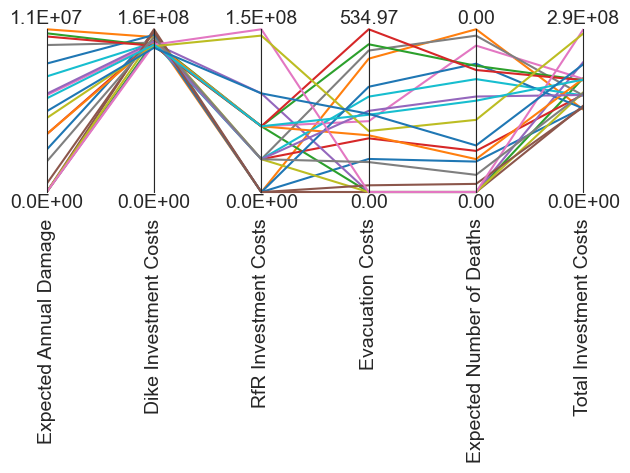

In [12]:
#Create a pairplot to see the tradeoffs for each policy for the different outcomes

limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths', 'Total Investment Costs']] = 0

formatter = {
    'Expected Annual Damage': '0.1E',
    'Dike Investment Costs': '0.1E',
    'RfR Investment Costs': '0.1E', 
    'Evacuation Costs': '.2f', 
    'Expected Number of Deaths': '.2f', 
    'Total Investment Costs': '0.1E',
}

paraxes = parcoords.ParallelAxes(limits, formatter)
paraxes.plot(data)
# plt.show()

In [13]:
my_archives = ArchiveLogger.load_archives("./directed search results/directed_search_convergence.tar.gz")


# Iterate over each key (DataFrame) in the dictionary to remove the one empty column
for key in my_archives:
    if 'Unnamed: 0' in my_archives[key].columns:
        my_archives[key] = my_archives[key].drop(columns=['Unnamed: 0'])




In [14]:

df = pd.concat(my_archives.values(), ignore_index=True)
df.head()


# Example lengths of the original DataFrames in my_archives
lengths = my_archives.keys() #[len(df1), len(df2), len(df3)]  # Replace with actual lengths
keys = my_archives.keys()#['key1', 'key2', 'key3']  # Replace with actual keys

# Assuming df is already defined
# Create an empty dictionary to store the split DataFrames
reconstructed_archives = {}

# Initialize the start index
start_idx = 0

# Iterate over lengths and keys to reconstruct the dictionary
for key, length in zip(keys, lengths):
    end_idx = start_idx + length
    reconstructed_archives[key] = df.iloc[start_idx:end_idx].reset_index(drop=True)
    start_idx = end_idx



In [15]:
from ema_workbench import HypervolumeMetric
from ema_workbench.em_framework.optimization import to_problem

reference_set = results
problem = to_problem(dike_model, searchover="levers")
reference_set.columns


Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths',
       'Total Investment Costs'],
      dtype='object')

In [16]:
import numpy as np

hv = HypervolumeMetric(reference_set, problem)

hypervolume = []
print(len(my_archives.items()))


# Iterate through my_archives and calculate hypervolume for each entry
for nfe, my_archive in my_archives.items():
    # Calculate hypervolume
    hypervolume_value = hv.calculate(my_archive)
    
    # Append (nfe, hypervolume_value) tuple to hypervolume list
    hypervolume.append((nfe, hypervolume_value))
    
    # Print progress report
    print(f"Progress: Calculated hypervolume for {nfe} NFEs")
    
# Sort hypervolume list based on the first element (nfe)
hypervolume.sort(key=lambda x: x[0])

# Convert hypervolume list to numpy array
hypervolume = np.asarray(hypervolume)


12
Progress: Calculated hypervolume for 0 NFEs
Progress: Calculated hypervolume for 100 NFEs
Progress: Calculated hypervolume for 11099 NFEs
Progress: Calculated hypervolume for 1191 NFEs
Progress: Calculated hypervolume for 2283 NFEs
Progress: Calculated hypervolume for 3376 NFEs
Progress: Calculated hypervolume for 4467 NFEs
Progress: Calculated hypervolume for 5559 NFEs
Progress: Calculated hypervolume for 6654 NFEs
Progress: Calculated hypervolume for 7743 NFEs
Progress: Calculated hypervolume for 8829 NFEs
Progress: Calculated hypervolume for 9917 NFEs


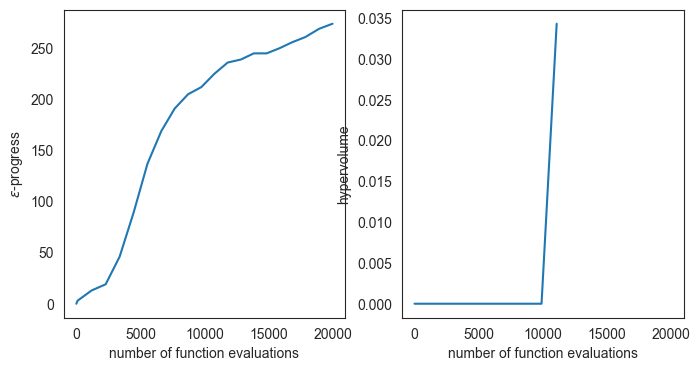

In [19]:
#Time 14:37
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(hypervolume[:, 0], hypervolume[:, 1])
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()